In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from pathlib import Path

import sys

sys.path.append('../src')

from Config.config import PATHS

import warnings
warnings.filterwarnings("ignore")

### Test focal region similarity

In [2]:
from Classes.focal_regions import FocalRegion

In [3]:
region = np.array([[1, 0, 1], [1, 1, 0], [0, 1, 1]])
fra = FocalRegion(region)
fra.debug = True
print('Focal region:')
print(fra)

# history = np.array([[1, 0], [0, 1], [0, 1]])
history = np.array([[0], [1], [1]])
print('History:\n', history)
print('-'*60)
scores = fra.get_similarity_scores(history)
print('Scores:\n', scores)
print('-'*60)

Focal region:
------------------------------------------------------------
[[1 0 1]
 [1 1 0]
 [0 1 1]]
------------------------------------------------------------
History:
 [[0]
 [1]
 [1]]
------------------------------------------------------------
	Cicle from column 0:
[[1]
 [1]
 [0]]
	Similarity score: 0.3333333333333333
	Cicle from column 1:
[[0]
 [1]
 [1]]
	Similarity score: 1.0
	Cicle from column 2:
[[1]
 [0]
 [1]]
	Similarity score: 0.3333333333333333
Scores:
 [np.float64(0.3333333333333333), np.float64(1.0), np.float64(0.3333333333333333)]
------------------------------------------------------------


<Axes: >

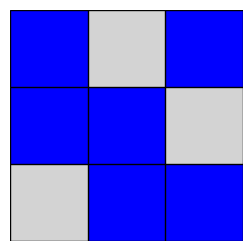

In [4]:
file_name = Path('..', 'LaTeX', 'FRA_region_1.png')
FocalRegion.draw_region(region, file=file_name)

<Axes: >

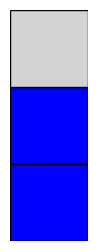

In [5]:
file_name = Path('..', 'LaTeX', 'history_2.png')
FocalRegion.draw_region(history, file=file_name)

### Test Focal Regions

In [2]:
from Classes.focal_regions import SetFocalRegions

In [7]:
sfr = SetFocalRegions(
    num_agents=6,
    threshold=0.5,
    len_history=2,
    c=0.75,
    steepness=10,
    max_regions=3,
)
sfr.generate_focal_regions()
print(sfr)

Num. fair regions: 120
Num. segmented regions: 20
Region 0
------------------------------------------------------------
[[0. 0. 0. 1. 1. 1.]
 [0. 1. 0. 0. 1. 1.]
 [0. 1. 1. 0. 0. 1.]
 [1. 1. 1. 0. 0. 0.]
 [1. 0. 1. 1. 0. 0.]
 [1. 0. 0. 1. 1. 0.]]
------------------------------------------------------------
Region 1
------------------------------------------------------------
[[1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0.]]
------------------------------------------------------------
Region 2
------------------------------------------------------------
[[0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 1. 0.]
 [0. 0. 1. 1. 1. 0.]
 [1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 0. 1.]
 [1. 1. 0. 0. 0. 1.]]
------------------------------------------------------------



In [4]:
history = np.array([1, 0])
sfr.add_history(history)
history = np.array([0, 1])
sfr.add_history(history)
sfr.debug = True
sfr.get_action_preferences(0)

Considering preferences from the viewpoint of agent 0
------------------------------------------------------------
Similarities according to region 0: [0. 1.]
	Sigmoid similarities: [0. 1.]
Similarities according to region 1: [0.  0.5]
	Sigmoid similarities: [0.         0.08153562]
Similarities according to region 2: [0.5 0. ]
	Sigmoid similarities: [0.08153562 0.        ]
Aggregated preferences: (no go=0.0815356159649889; go=1.081535615964989)


array([0.08153562, 1.08153562])

### Test FRA agents

In [12]:
from Classes.bar import Bar
from Utils.interaction import Episode
from Classes.focal_regions import SetFocalRegions
from Classes.cognitive_model_agents import FocalRegionAgent

In [25]:
free_parameters = {
    'inverse_temperature': 6,
    'len_history': 2,
    'c': 0.7
}
fixed_parameters = {
    'num_agents': 2,
    'threshold': 0.5,
}
n = 1

<Axes: >

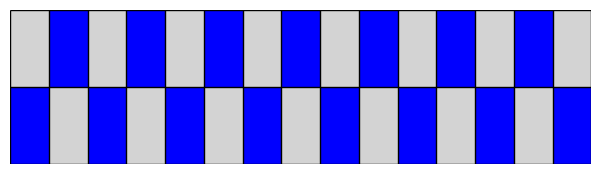

In [30]:
# Create the environment
bar = Bar(
    num_agents=fixed_parameters['num_agents'],
    threshold=fixed_parameters['threshold']
)
# Create the agents
agents = [FocalRegionAgent(free_parameters, fixed_parameters, n) for n in range(fixed_parameters['num_agents'])]
# Create the episode
episode = Episode(
    model='FRA',
    agents=agents,
    environment=bar,
    num_rounds=50
)

episode.run()

bar.render()

# Test simulations

In [9]:
from Utils.interaction import Performer
from Utils.utils import GetMeasurements
from Classes.cognitive_model_agents import Titan

In [10]:
fixed_parameters = {
	"num_agents":2,
	"threshold":0.5,
}
free_parameters = {
    'inverse_temperature': 6, 
    'learning_rate': 0.16, 
    'bias': 0.78, 
    'len_history': 2, 
    'c': 0.9, 
    'delta': 1
}
simulation_parameters = {
	'num_rounds': 50,
    'num_episodes': 23,
	'verbose':False
}

Num. fair regions: 1
Num. segmented regions: 2
Num. fair regions: 1
Num. segmented regions: 2
Num. fair regions: 1
Num. segmented regions: 2
Num. fair regions: 1
Num. segmented regions: 2
Num. fair regions: 1
Num. segmented regions: 2
Num. fair regions: 1
Num. segmented regions: 2


  0%|          | 0/23 [00:00<?, ?it/s]

Num. fair regions: 1
Num. segmented regions: 2
Num. fair regions: 1
Num. segmented regions: 2
Num. fair regions: 1
Num. segmented regions: 2
Num. fair regions: 1
Num. segmented regions: 2
Num. fair regions: 1
Num. segmented regions: 2
Num. fair regions: 1
Num. segmented regions: 2
Num. fair regions: 1
Num. segmented regions: 2
Num. fair regions: 1
Num. segmented regions: 2
Num. fair regions: 1
Num. segmented regions: 2
Num. fair regions: 1
Num. segmented regions: 2
Num. fair regions: 1
Num. segmented regions: 2
Num. fair regions: 1
Num. segmented regions: 2
Num. fair regions: 1
Num. segmented regions: 2
Num. fair regions: 1
Num. segmented regions: 2
Num. fair regions: 1
Num. segmented regions: 2
Num. fair regions: 1
Num. segmented regions: 2
Num. fair regions: 1
Num. segmented regions: 2
Num. fair regions: 1
Num. segmented regions: 2
Num. fair regions: 1
Num. segmented regions: 2
Num. fair regions: 1
Num. segmented regions: 2
Num. fair regions: 1
Num. segmented regions: 2
Num. fair reg

(-0.05, 0.55)

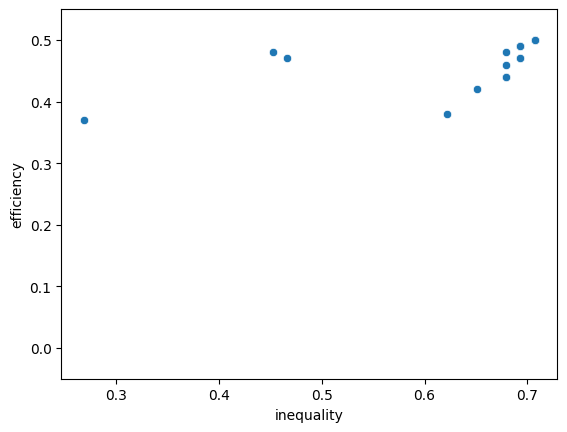

In [11]:
df = Performer.sim(
    agent_class=Titan,
    fixed_parameters=fixed_parameters,
    free_parameters=free_parameters,
    simulation_parameters=simulation_parameters
)
gm = GetMeasurements(
    data=df, measures=['efficiency', 'inequality']
)
data = gm.get_measurements()
ax = sns.scatterplot(
    x='inequality', y='efficiency',
    data=data
)
ax.set_ylim([-0.05, .55])

# Test parameter fit

In [2]:
from Classes.cognitive_model_agents import Titan
from Classes.parameter_recovery import ParameterFit

In [3]:
# my_models = [FocalRegionAgent]
my_models = [Titan]

best_fit_file_2P = PATHS['parameter_fit_results'] / 'best_fit_2P_3.json'

#Load 2P data
file = PATHS['human_data'] / '2-player-UR.csv'
print(f'Loading data from {file}...')
data = pd.read_csv(file)
data.head(2)

Loading data from /Users/edgar/Documents/GitHub/Cognitive_Models_El_Farol_Bar_Problem/data/human/2-player-UR.csv...


,source,treatment,group,round,player,choice,score,attendance,ac_score,threshold,num_players,room,decision
0,human,score + grid,Grupo-0001,1,405186428721292,0,0,1,25,0.5,2,Grupo-0001,0
1,human,score + grid,Grupo-0001,1,728608683559397,1,1,1,25,0.5,2,Grupo-0001,1


In [4]:
hyperparameters = {
    'n_iter': 128,
    'init_points': 64,
}

ParameterFit.run(
    data=data,
    model_list=my_models,
    best_fit_path=best_fit_file_2P,
    optimizer_type='bayesian',
    hyperparameters=hyperparameters,
    new_file=False
)

Fitting models...:   0%|          | 0/1 [00:00<?, ?it/s]

Fitting data to model FRA+Payoff+Attendance...
Creating parameter recovery class...
Running optimizer...
Finding deviance for 2 players and threshold 0.5...
|   iter    |  target   | invers... |   bias    | learni... | len_hi... |     c     |   delta   |
-------------------------------------------------------------------------------------------------
| 1         | -3171.170 | 27.272386 | 0.7203244 | 0.0001143 | 1.6046651 | 0.5733779 | 0.0092338 |
| 2         | -4464.421 | 12.734393 | 0.3455607 | 0.3967674 | 2.0776334 | 0.7095972 | 0.0685219 |
| 3         | -2237.168 | 13.880491 | 0.8781174 | 0.0273875 | 2.3409350 | 0.7086524 | 0.0558689 |
| 4         | -6891.395 | 9.8443771 | 0.1981014 | 0.8007445 | 2.9365231 | 0.6567120 | 0.0692322 |
| 5         | -4045.177 | 56.212516 | 0.8946066 | 0.0850442 | 1.0781095 | 0.5849152 | 0.0878142 |
| 6         | -4455.549 | 7.1958505 | 0.4211076 | 0.9578895 | 2.0663305 | 0.8459385 | 0.0315515 |
| 7         | -2754.958 | 44.249558 | 0.8346256 | 0.0182882

In [7]:
ParameterFit.run(
    data=data,
    model_list=my_models,
    best_fit_path=best_fit_file_2P,
    optimizer_type='scipy',
    hyperparameters={},
    new_file=False
)

Fitting models...:   0%|          | 0/1 [00:00<?, ?it/s]

Fitting data to model FRA+Payoff+Attendance...
Creating parameter recovery class...
Running optimizer...
Finding deviance for 2 players and threshold 0.5...
Optimal parameters for 2 players and threshold 0.5:
{'inverse_temperature': np.float64(6.318130859975263), 'bias': np.float64(0.7860624859587133), 'learning_rate': np.float64(0.1612130477882558), 'len_history': np.float64(2.0712403283503287), 'c': np.float64(0.9173537687429141), 'delta': np.float64(0.1)}
Deviance: -2175.1644782663743
AIC: 4362.328956532749
--------------------------------------------------


---

In [10]:
from Classes.parameter_recovery import GetDeviance

free_parameters = {
    'inverse_temperature': 6, 
    'learning_rate': 0.16, 
    'bias': 0.78, 
    'len_history': 2, 
    'c': 0.91, 
    'delta': 0.1
}
g_dev = GetDeviance(
    model=Titan,
    free_parameters=free_parameters,
    data=data
)

g_dev.get_deviance_from_data(free_parameters)

np.float64(2176.6420997516866)